# Telecom Churn Prediction 

In [1]:
## supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries 

import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
## Importing a dataset 

# There are two ways to import dataset 
# 1. Path 
# 2. filename

df = pd.read_csv('telecom.csv')

In [4]:
# To check the top 5 rows in the dataset 

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# To check the bottom 5 rows in the dataset 

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# To check the shape of the dataset 

df.shape

(7043, 21)

In [7]:
# To get the statistical info of the dataset 

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# DATA VISUALIZATION

In [9]:
# two libraries for data visualization

## seaborn 
## matplotlib 

In [10]:
# data visualization for InternetService,PhoneService and MultipleLines 

# The four types of EDA are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

# 1 Univariate non-graphical Analysis

# Frequency Count

In [95]:
# Count occurrences of categories in 'PhoneService' column
phone_service_counts = df['PhoneService'].value_counts()
print("Phone Service Counts:")
print(phone_service_counts)

# Count occurrences of categories in 'MultipleLines' column
multiple_lines_counts = df['MultipleLines'].value_counts()
print("\nMultiple Lines Counts:")
print(multiple_lines_counts)

# Count occurrences of categories in 'InternetService' column
internet_service_counts = df['InternetService'].value_counts()
print("\nInternet Service Counts:")
print(internet_service_counts)

Phone Service Counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Multiple Lines Counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Internet Service Counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


# Missing Values

In [97]:
# Check for missing values in 'PhoneService' column
missing_values = df['PhoneService'].isnull().sum()
print(f"Number of missing values in 'PhoneService': {missing_values}")

# Check for missing values in 'MultipleLines' column
missing_values = df['MultipleLines'].isnull().sum()
print(f"Number of missing values in 'MultipleLines': {missing_values}")

# Check for missing values in 'InternetService' column
missing_values = df['InternetService'].isnull().sum()
print(f"Number of missing values in 'InternetService': {missing_values}")


Number of missing values in 'PhoneService': 0
Number of missing values in 'MultipleLines': 0
Number of missing values in 'InternetService': 0


# To check the duplicates

In [99]:
phone_service_duplicates = df['PhoneService'].duplicated()
print("Duplicate values in 'PhoneService':")
print(phone_service_duplicates)

multiple_lines_duplicates = df['MultipleLines'].duplicated()
print("\nDuplicate values in 'MultipleLines':")
print(multiple_lines_duplicates)

internet_service_duplicates = df['InternetService'].duplicated()
print("\nDuplicate values in 'InternetService':")
print(internet_service_duplicates)

Duplicate values in 'PhoneService':
0       False
1       False
2        True
3        True
4        True
        ...  
7038     True
7039     True
7040     True
7041     True
7042     True
Name: PhoneService, Length: 7043, dtype: bool

Duplicate values in 'MultipleLines':
0       False
1       False
2        True
3        True
4        True
        ...  
7038     True
7039     True
7040     True
7041     True
7042     True
Name: MultipleLines, Length: 7043, dtype: bool

Duplicate values in 'InternetService':
0       False
1        True
2        True
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041     True
7042     True
Name: InternetService, Length: 7043, dtype: bool


# Summary Statistics: Although summary statistics like mean, median, and mode are more relevant for numerical data, for binary categorical data (like Yes/No), you could calculate the proportion of “Yes” responses (which could serve as a “mean”).

In [102]:
# Calculate the proportion of 'Yes' values in the 'PhoneService' column
phone_service_mean = (df['PhoneService'] == 'Yes').mean()
print("Proportion of 'Yes' values in 'PhoneService':", phone_service_mean)

# Calculate the proportion of 'Yes' values in the 'MultipleLines' column
multiple_lines_mean = (df['MultipleLines'] == 'Yes').mean()
print("Proportion of 'Yes' values in 'MultipleLines':", multiple_lines_mean)

# Calculate the proportion of 'Yes' values in the 'InternetService' column
internet_service_mean = (df['InternetService'] == 'Yes').mean()
print("Proportion of 'Yes' values in 'InternetService':", internet_service_mean)

Proportion of 'Yes' values in 'PhoneService': 0.9031662643759761
Proportion of 'Yes' values in 'MultipleLines': 0.42183728524776376
Proportion of 'Yes' values in 'InternetService': 0.0


# Percentage Analysis

In [105]:
phone_service_percentages = df['PhoneService'].value_counts(normalize=True) * 100
print("Percentage of each category in 'PhoneService':")
print(phone_service_percentages)

multiple_lines_percentages = df['MultipleLines'].value_counts(normalize=True) * 100
print("\nPercentage of each category in 'MultipleLines':")
print(multiple_lines_percentages)

internet_service_percentages = df['InternetService'].value_counts(normalize=True) * 100
print("\nPercentage of each category in 'InternetService':")
print(internet_service_percentages)

Percentage of each category in 'PhoneService':
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

Percentage of each category in 'MultipleLines':
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

Percentage of each category in 'InternetService':
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64


# 2 Multivariate non- graphical Analysis

# Cross-tabulation

In [116]:
# Crosstab between 'PhoneService' and 'Churn'
phone_service_churn_crosstab = pd.crosstab(df['PhoneService'], df['Churn'])
print("Crosstab between 'PhoneService' and 'Churn':")
print(phone_service_churn_crosstab)

# Crosstab between 'MultipleLines' and 'Churn'
multiple_lines_churn_crosstab = pd.crosstab(df['MultipleLines'], df['Churn'])
print("\nCrosstab between 'MultipleLines' and 'Churn':")
print(multiple_lines_churn_crosstab)

# Crosstab between 'InternetService' and 'Churn'
internet_service_churn_crosstab = pd.crosstab(df['InternetService'], df['Churn'])
print("\nCrosstab between 'InternetService' and 'Churn':")
print(internet_service_churn_crosstab)

Crosstab between 'PhoneService' and 'Churn':
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

Crosstab between 'MultipleLines' and 'Churn':
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

Crosstab between 'InternetService' and 'Churn':
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


# CORRELATION between (PhoneService , MultipleLines and InternetService) and Churn

In [118]:
df_encoded = df.copy()

# Map 'Yes' and 'No' to 1 and 0 for 'PhoneService', 'MultipleLines', 'InternetService', and 'Churn' columns
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Calculate correlation
correlation_phone_churn = df_encoded[['PhoneService', 'Churn']].corr()
print("Correlation between 'PhoneService' and 'Churn':")
print(correlation_phone_churn)

correlation_multiple_churn = df_encoded[['MultipleLines', 'Churn']].corr()
print("\nCorrelation between 'MultipleLines' and 'Churn':")
print(correlation_multiple_churn)

correlation_internet_churn = df_encoded[['InternetService', 'Churn']].corr()
print("\nCorrelation between 'InternetService' and 'Churn':")
print(correlation_internet_churn)

Correlation between 'PhoneService' and 'Churn':
              PhoneService     Churn
PhoneService      1.000000  0.011942
Churn             0.011942  1.000000

Correlation between 'MultipleLines' and 'Churn':
               MultipleLines     Churn
MultipleLines       1.000000  0.040207
Churn               0.040207  1.000000

Correlation between 'InternetService' and 'Churn':
                 InternetService  Churn
InternetService              NaN    NaN
Churn                        NaN    1.0


# 3. Univariate graphical analysis

# Bar Plot

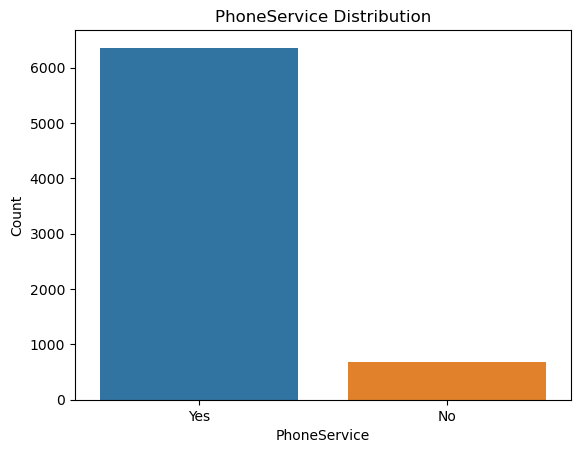

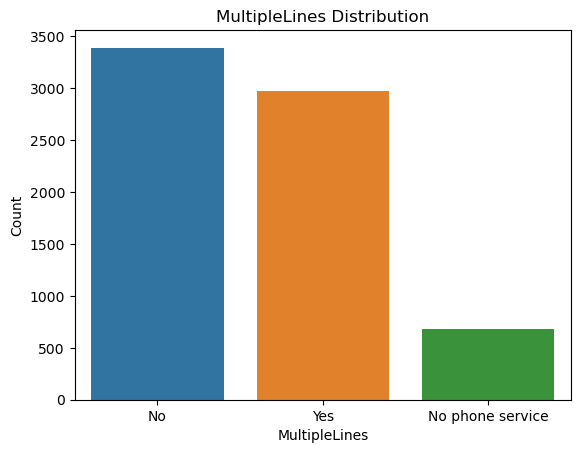

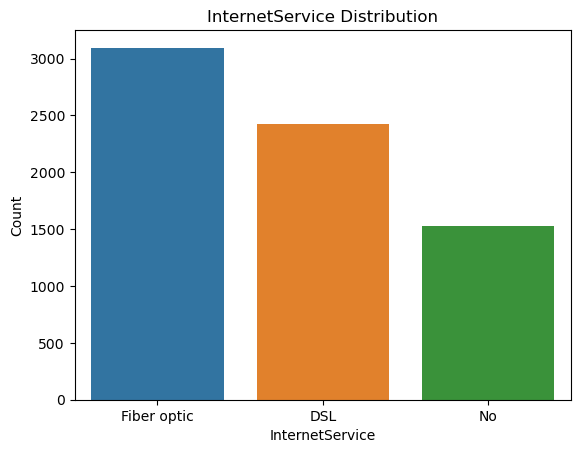

In [123]:
# Count the frequency of each category in 'PhoneService'
phone_service_counts = df['PhoneService'].value_counts()

# Create bar plot for 'PhoneService'
sns.barplot(x=phone_service_counts.index, y=phone_service_counts.values)
plt.title('PhoneService Distribution')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.show()

# Count the frequency of each category in 'MultipleLines'
multiple_lines_counts = df['MultipleLines'].value_counts()

# Create bar plot for 'MultipleLines'
sns.barplot(x=multiple_lines_counts.index, y=multiple_lines_counts.values)
plt.title('MultipleLines Distribution')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

# Count the frequency of each category in 'InternetService'
internet_service_counts = df['InternetService'].value_counts()

# Create bar plot for 'InternetService'
sns.barplot(x=internet_service_counts.index, y=internet_service_counts.values)
plt.title('InternetService Distribution')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

# Count Plot

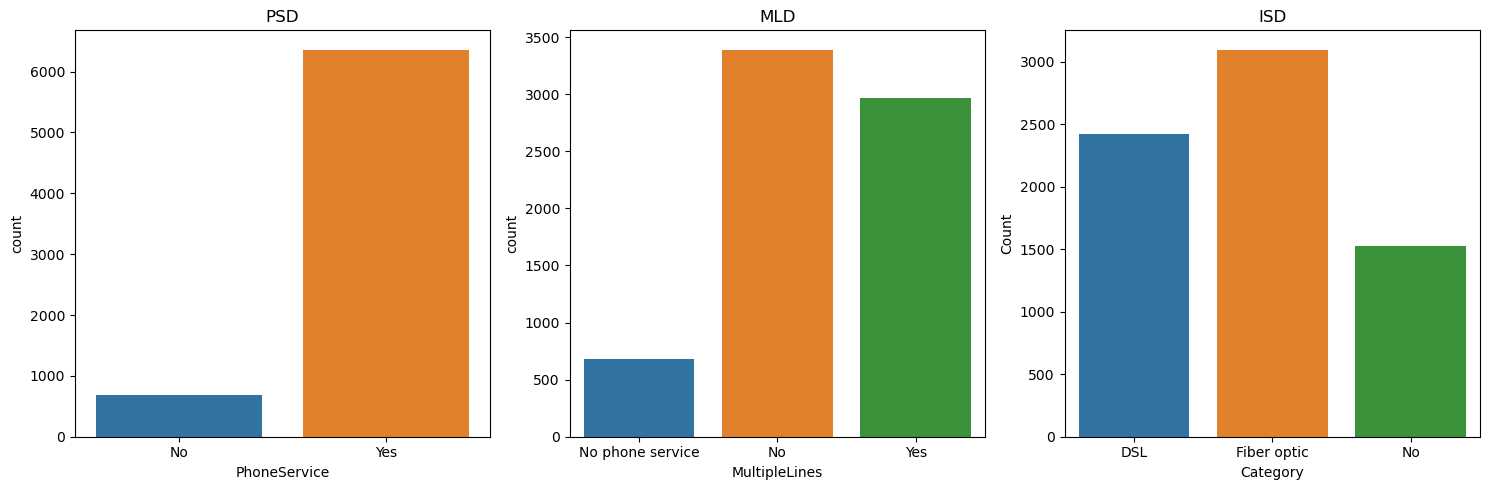

In [143]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot countplots for each variable
sns.countplot(data=df, x='PhoneService', ax=axes[0])
axes[0].set_title('PSD')

sns.countplot(data=df, x='MultipleLines', ax=axes[1])
axes[1].set_title('MLD')

sns.countplot(data=df, x='InternetService', ax=axes[2])
axes[2].set_title('ISD')

# Adjust labels and title
plt.xlabel('Category')
plt.ylabel('Count')

# Display plot
plt.tight_layout()
plt.show()


# Pie Chart

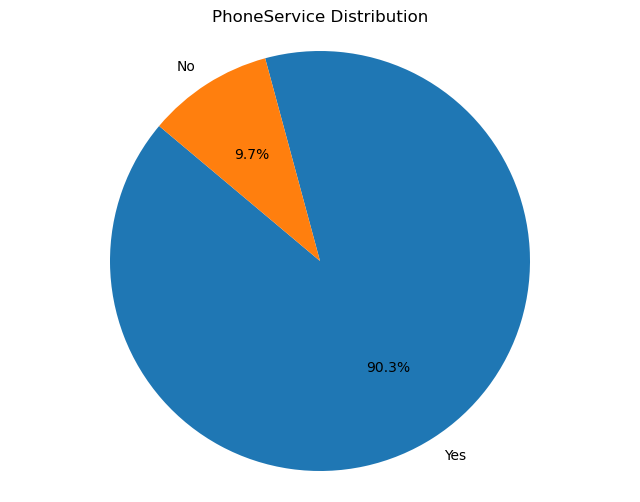

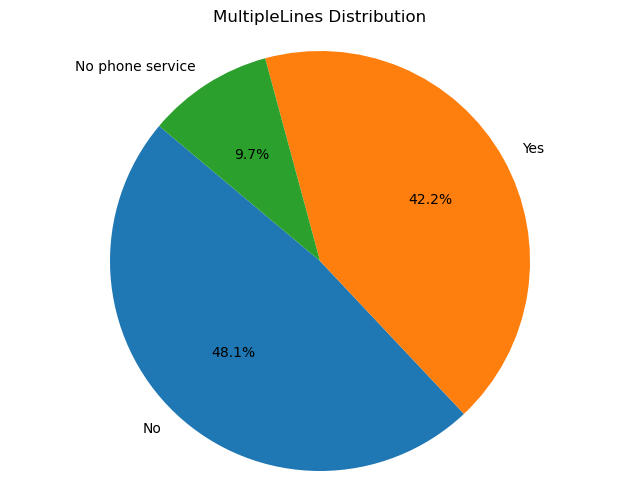

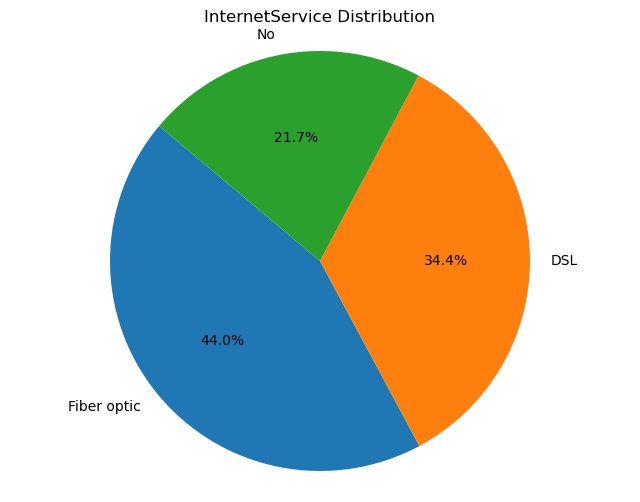

In [152]:
import matplotlib.pyplot as plt

# Calculate the frequencies of each category in 'PhoneService'
phone_service_counts = df['PhoneService'].value_counts()

# Create a pie chart for 'PhoneService'
plt.figure(figsize=(8, 6))
plt.pie(phone_service_counts, labels=phone_service_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('PhoneService Distribution')
plt.show()

# Calculate the frequencies of each category in 'MultipleLines'
multiple_lines_counts = df['MultipleLines'].value_counts()

# Create a pie chart for 'MultipleLines'
plt.figure(figsize=(8, 6))
plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('MultipleLines Distribution')
plt.show()

# Calculate the frequencies of each category in 'InternetService'
internet_service_counts = df['InternetService'].value_counts()

# Create a pie chart for 'InternetService'
plt.figure(figsize=(8, 6))
plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('InternetService Distribution')
plt.show()



# 4 Multivariate Graphical Analysis

# Jitter Plot

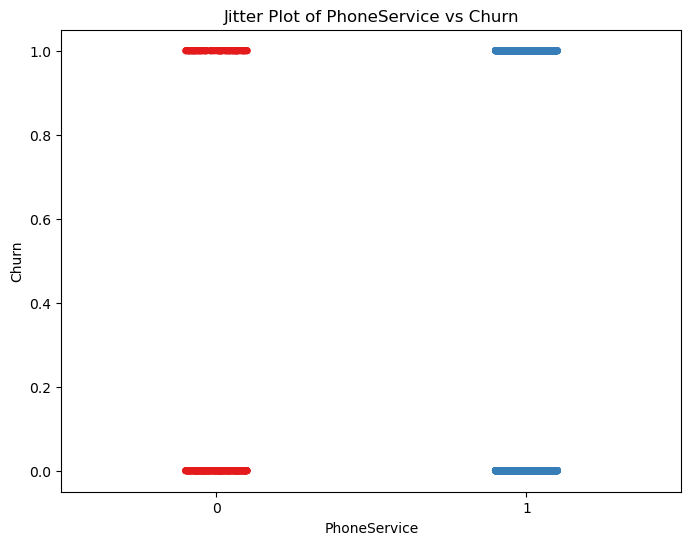

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create jitter plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='PhoneService', y='Churn', data=df_encoded, jitter=True, palette='Set1')
plt.title('Jitter Plot of PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Churn')
plt.show()


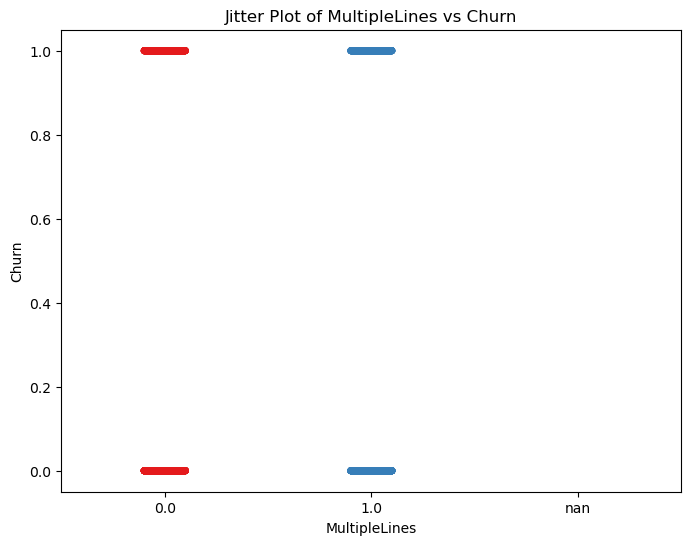

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create jitter plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='MultipleLines', y='Churn', data=df_encoded, jitter=True, palette='Set1')
plt.title('Jitter Plot of MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Churn')
plt.show()


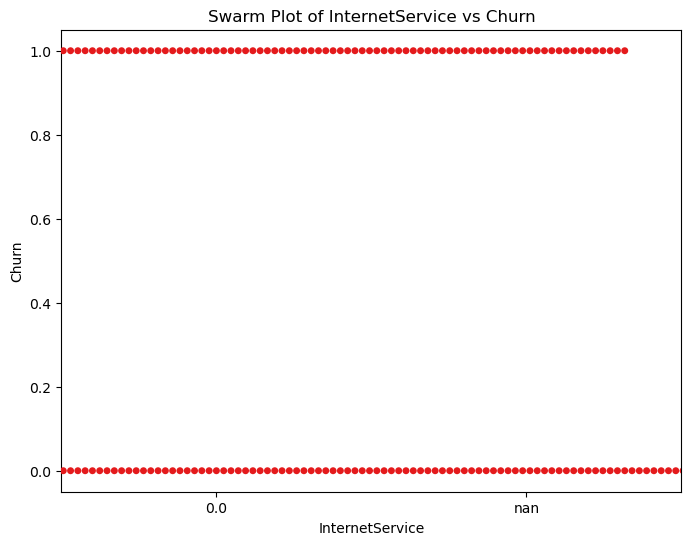

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='InternetService', y='Churn', data=df_encoded, palette='Set1')
plt.title('Swarm Plot of InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.show()


# Countplot of relationship with churn 

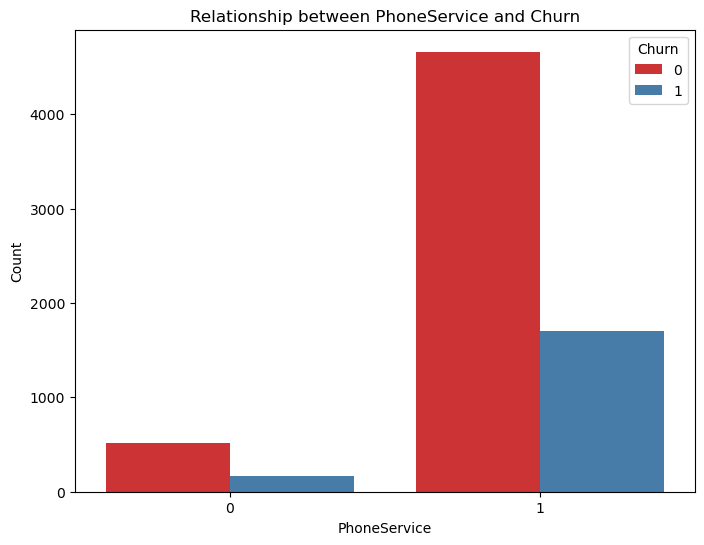

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='PhoneService', hue='Churn', palette='Set1')
plt.title('Relationship between PhoneService and Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


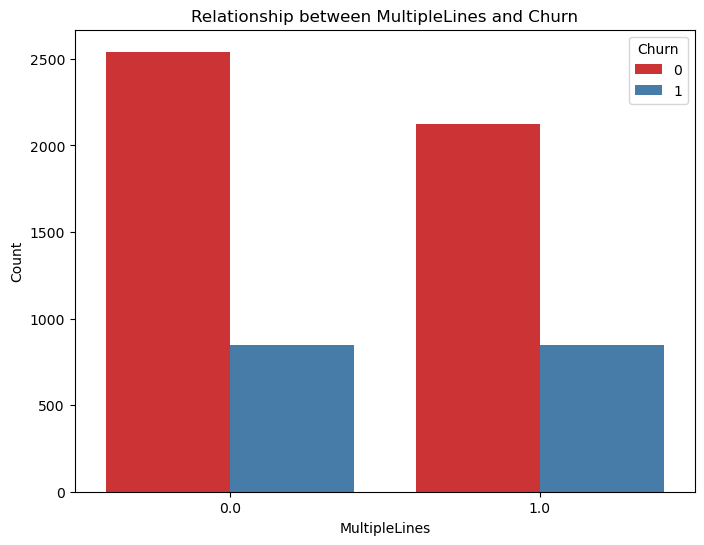

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='MultipleLines', hue='Churn', palette='Set1')
plt.title('Relationship between MultipleLines and Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


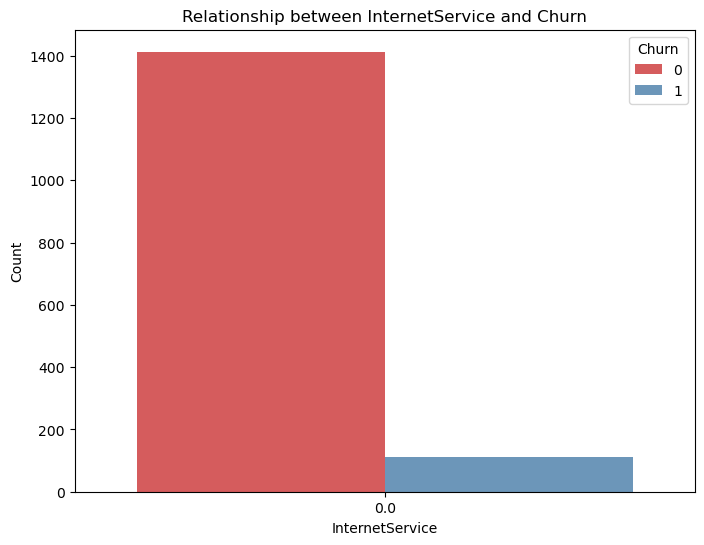

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='InternetService', hue='Churn', palette='Set1', alpha=0.8)
plt.title('Relationship between InternetService and Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


# Scatter Plot

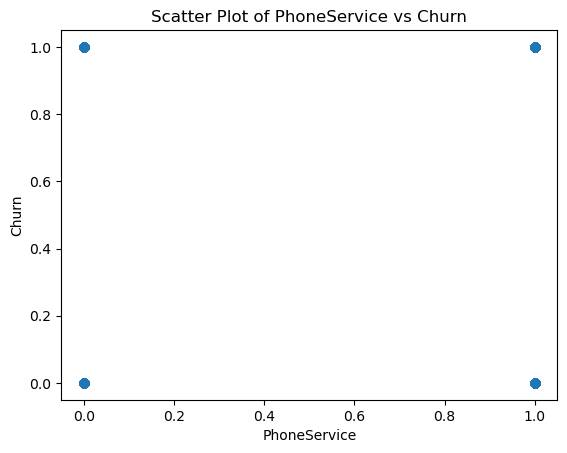

In [69]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create scatter plot
plt.scatter(df_encoded['PhoneService'], df_encoded['Churn'])
plt.title('Scatter Plot of PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Churn')
plt.show()

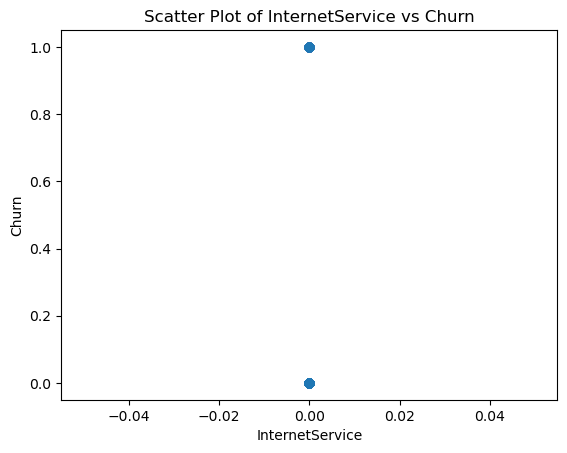

In [166]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create scatter plot
plt.scatter(df_encoded['InternetService'], df_encoded['Churn'])
plt.title('Scatter Plot of InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.show()

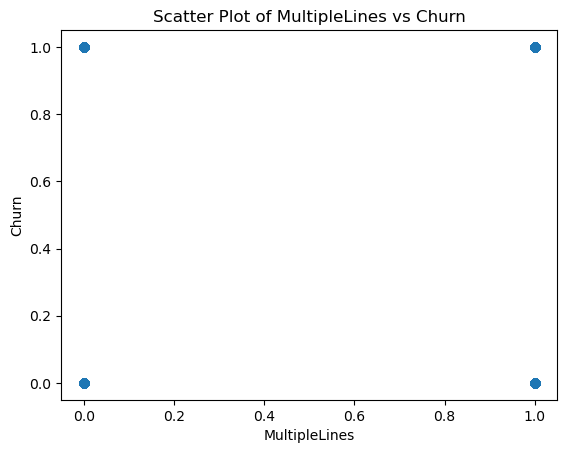

In [167]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create scatter plot
plt.scatter(df_encoded['MultipleLines'], df_encoded['Churn'])
plt.title('Scatter Plot of MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Churn')
plt.show()

# Heatmap

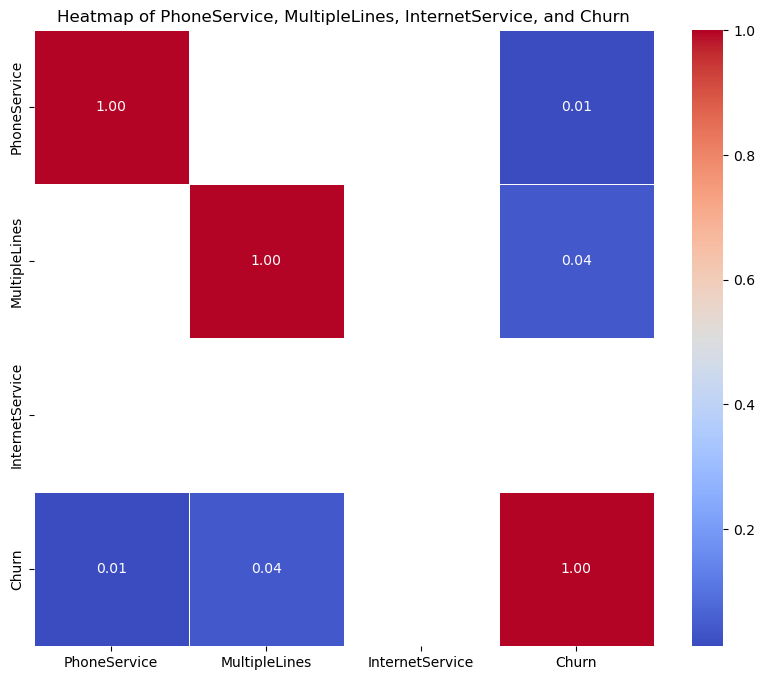

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Calculate correlation matrix
correlation_matrix = df_encoded[['PhoneService', 'MultipleLines', 'InternetService', 'Churn']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of PhoneService, MultipleLines, InternetService, and Churn')
plt.show()


# Pairplot

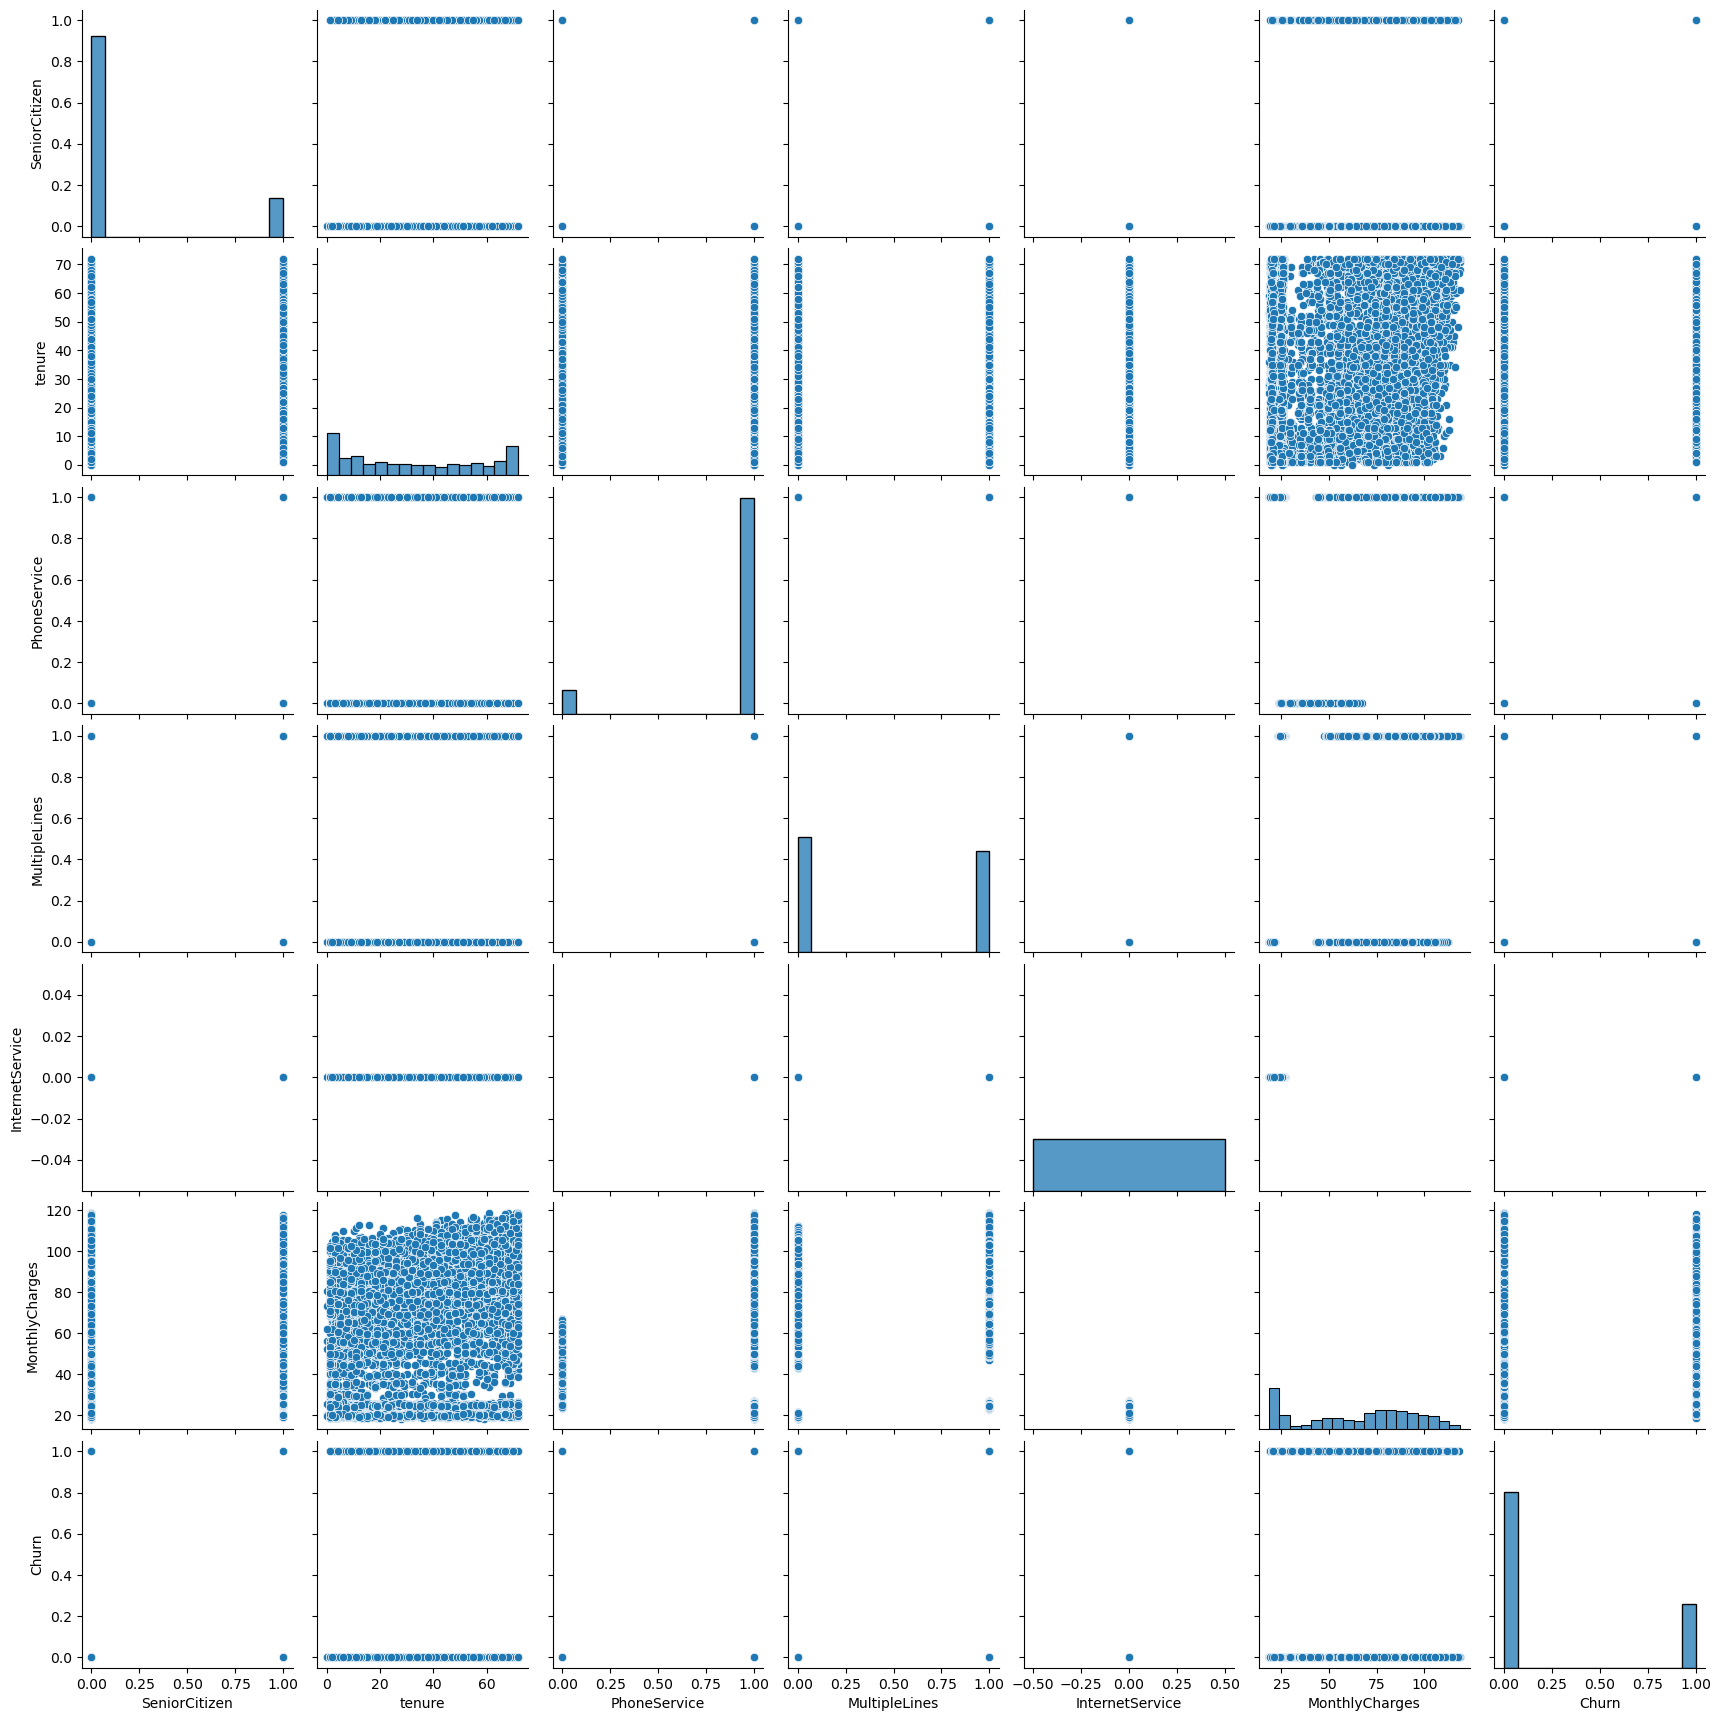

In [172]:
sns.pairplot(df_encoded)
plt.show()

# multivariate graphical analysis

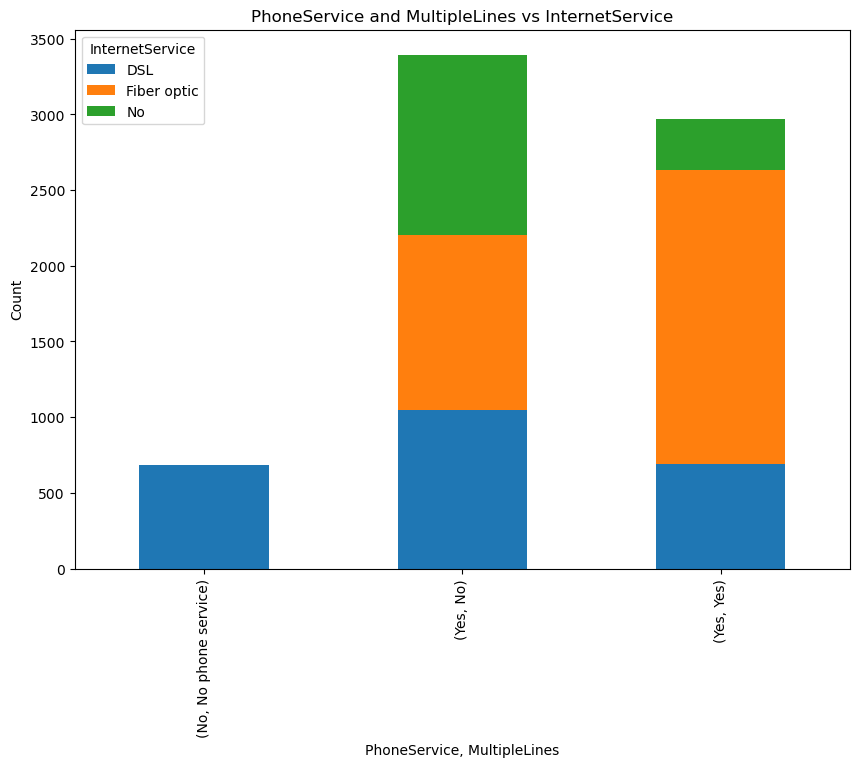

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of 'PhoneService', 'MultipleLines', and 'InternetService'
contingency_table = pd.crosstab([df['PhoneService'], df['MultipleLines']], df['InternetService'])

# Plot the contingency table as a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('PhoneService and MultipleLines vs InternetService')
plt.xlabel('PhoneService, MultipleLines')
plt.ylabel('Count')
plt.show()


# One-Hot Encoding

In [73]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['PhoneService'], prefix = ['PhoneService'])

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0  7590-VHVEG  Female              0     Yes         No       1   
1  5575-GNVDE    Male              0      No         No      34   
2  3668-QPYBK    Male              0      No         No       2   
3  7795-CFOCW    Male              0      No         No      45   
4  9237-HQITU  Female              0      No         No       2   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No   

In [186]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['MultipleLines'], prefix = ['MultipleLines'])

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  InternetService OnlineSecurity OnlineBackup  ... StreamingMovies  \
0             DSL             No          Yes  ...              No   
1             DSL            Yes           No  ...              No   
2             DSL            Yes          Yes  ...              No   
3             DSL            Yes           No  ...              No   
4     Fiber optic             No           No  ...              No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month 

In [187]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['InternetService'], prefix = ['InternetService'])

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup  ... StreamingMovies  \
0  No phone service             No          Yes  ...              No   
1                No            Yes           No  ...              No   
2                No            Yes          Yes  ...              No   
3  No phone service            Yes           No  ...              No   
4                No             No           No  ...              No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Mon

# Chi-Square Test

In [78]:
from scipy.stats import chi2_contingency

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create contingency table
contingency_table = pd.crosstab(df_encoded['PhoneService'], df_encoded['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-Square statistic: 0.9150329892546948
P-value: 0.3387825358066928
Degrees of freedom: 1


In [188]:
from scipy.stats import chi2_contingency

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create contingency table
contingency_table = pd.crosstab(df_encoded['MultipleLines'], df_encoded['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-Square statistic: 10.102112714668198
P-value: 0.0014809944089070278
Degrees of freedom: 1


In [190]:
from scipy.stats import chi2_contingency

# Assuming 'Yes' is encoded as 1 and 'No' as 0
df_encoded = df.copy()
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Create contingency table
contingency_table = pd.crosstab(df_encoded['InternetService'], df_encoded['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-Square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0


# Ordinal Encoding

In [74]:
df_encoded = df.copy()
df_encoded['PhoneService'] = df_encoded['PhoneService'].map({'Yes': 1, 'No': 0})

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1             0   
1  5575-GNVDE    Male              0      No         No      34             1   
2  3668-QPYBK    Male              0      No         No       2             1   
3  7795-CFOCW    Male              0      No         No      45             0   
4  9237-HQITU  Female              0      No         No       2             1   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [184]:
df_encoded = df.copy()
df_encoded['MultipleLines'] = df_encoded['MultipleLines'].map({'Yes': 1, 'No': 0})

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            NaN             DSL             No  ...               No   
1            0.0             DSL            Yes  ...              Yes   
2            0.0             DSL            Yes  ...               No   
3            NaN             DSL            Yes  ...              Yes   
4            0.0     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

In [185]:
df_encoded = df.copy()
df_encoded['InternetService'] = df_encoded['InternetService'].map({'Yes': 1, 'No': 0})

print(df_encoded.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines  InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service              NaN             No  ...               No   
1                No              NaN            Yes  ...              Yes   
2                No              NaN            Yes  ...               No   
3  No phone service              NaN            Yes  ...              Yes   
4                No              NaN             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [182]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab( df['PhoneService'],df['Churn'],))
print("\nChi-square test between PhoneService and Churn:")
print("Chi-square:", chi2)
print("p-value:", p)



Chi-square test between PhoneService and Churn:
Chi-square: 0.9150329892546948
p-value: 0.3387825358066928


In [89]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab( df['InternetService'],df['Churn'],))
print("\nChi-square test betweenInternetService and Churn:")
print("Chi-square:", chi2)
print("p-value:", p)



Chi-square test betweenInternetService and Churn:
Chi-square: 732.309589667794
p-value: 9.571788222840544e-160


In [183]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['MultipleLines'], df['Churn']))
print("\nChi-square test between MultipleLines and Churn:")
print("Chi-square:", chi2)
print("p-value:", p)



Chi-square test between MultipleLines and Churn:
Chi-square: 11.33044148319756
p-value: 0.0034643829548773
